In [1]:
import ROOT
import my_library.common_analysis_tools as tools
import my_library.constants as constants
import my_library.kinematic_cuts as kcuts

Welcome to JupyROOT 6.24/04


In [2]:
ROOT.EnableImplicitMT()

In [3]:
df_spring = tools.get_dataframe('pipkmks', 'spring', 'data', filtered=False)
df_fall = tools.get_dataframe('pipkmks', 'fall', 'data', filtered=False)
df_2017 = tools.get_dataframe('pipkmks', '2017', 'data', filtered=False)


In [4]:
df_spring = df_spring.Filter(kcuts.KINFIT_CL_CUT).Filter(kcuts.MX2_PPIPKMKS_CUT).Filter(kcuts.KS_PATHLENGTH_CUT).Filter(kcuts.KS_MASS_CUT).Filter(kcuts.PPIP_MASS_CUT).Filter(kcuts.P_P_CUT).Filter(kcuts.KSTAR_ALL_CUT_PIPKMKS)
df_fall = df_fall.Filter(kcuts.KINFIT_CL_CUT).Filter(kcuts.MX2_PPIPKMKS_CUT).Filter(kcuts.KS_PATHLENGTH_CUT).Filter(kcuts.KS_MASS_CUT).Filter(kcuts.PPIP_MASS_CUT).Filter(kcuts.P_P_CUT).Filter(kcuts.KSTAR_ALL_CUT_PIPKMKS)
df_2017 = df_2017.Filter(kcuts.KINFIT_CL_CUT).Filter(kcuts.MX2_PPIPKMKS_CUT).Filter(kcuts.KS_PATHLENGTH_CUT).Filter(kcuts.KS_MASS_CUT).Filter(kcuts.PPIP_MASS_CUT).Filter(kcuts.P_P_CUT).Filter(kcuts.KSTAR_ALL_CUT_PIPKMKS)

In [5]:
df_spring = df_spring.Filter('kmp_m < 1.47')
df_fall = df_fall.Filter('kmp_m < 1.47')
df_2017 = df_2017.Filter('kmp_m < 1.47')

In [8]:
hist_spring = df_spring.Histo1D(('ksp_m_spring', 'M(pK_{s}) with M(pK^{-}) < 1.47 GeV', 50, 1.4, 2.5), 'ksp_m')
hist_fall = df_fall.Histo1D(('ksp_m_fall', 'M(pK_{s}) with M(pK^{-}) < 1.47 GeV', 50, 1.4, 2.5), 'ksp_m')
hist_2017 = df_2017.Histo1D(('ksp_m_2017', 'M(pK_{s}) with M(pK^{-}) < 1.47 GeV', 50, 1.4, 2.5), 'ksp_m')

hist_spring.Sumw2()
hist_fall.Sumw2()
hist_2017.Sumw2()

hist_total = hist_spring.Clone('ksp_m_total')
hist_total.Add(hist_fall.GetPtr())
hist_total.Add(hist_2017.GetPtr())

True

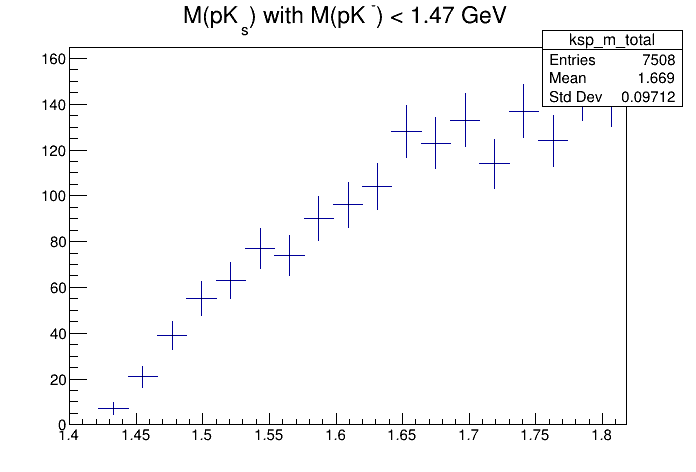

In [9]:
c = ROOT.TCanvas()
hist_total.GetXaxis().SetRangeUser(1.4, 1.8)
hist_total.Draw("E")
c.Draw()
